In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Load the datasets
df = pd.read_csv('data/train_cleaned.csv')

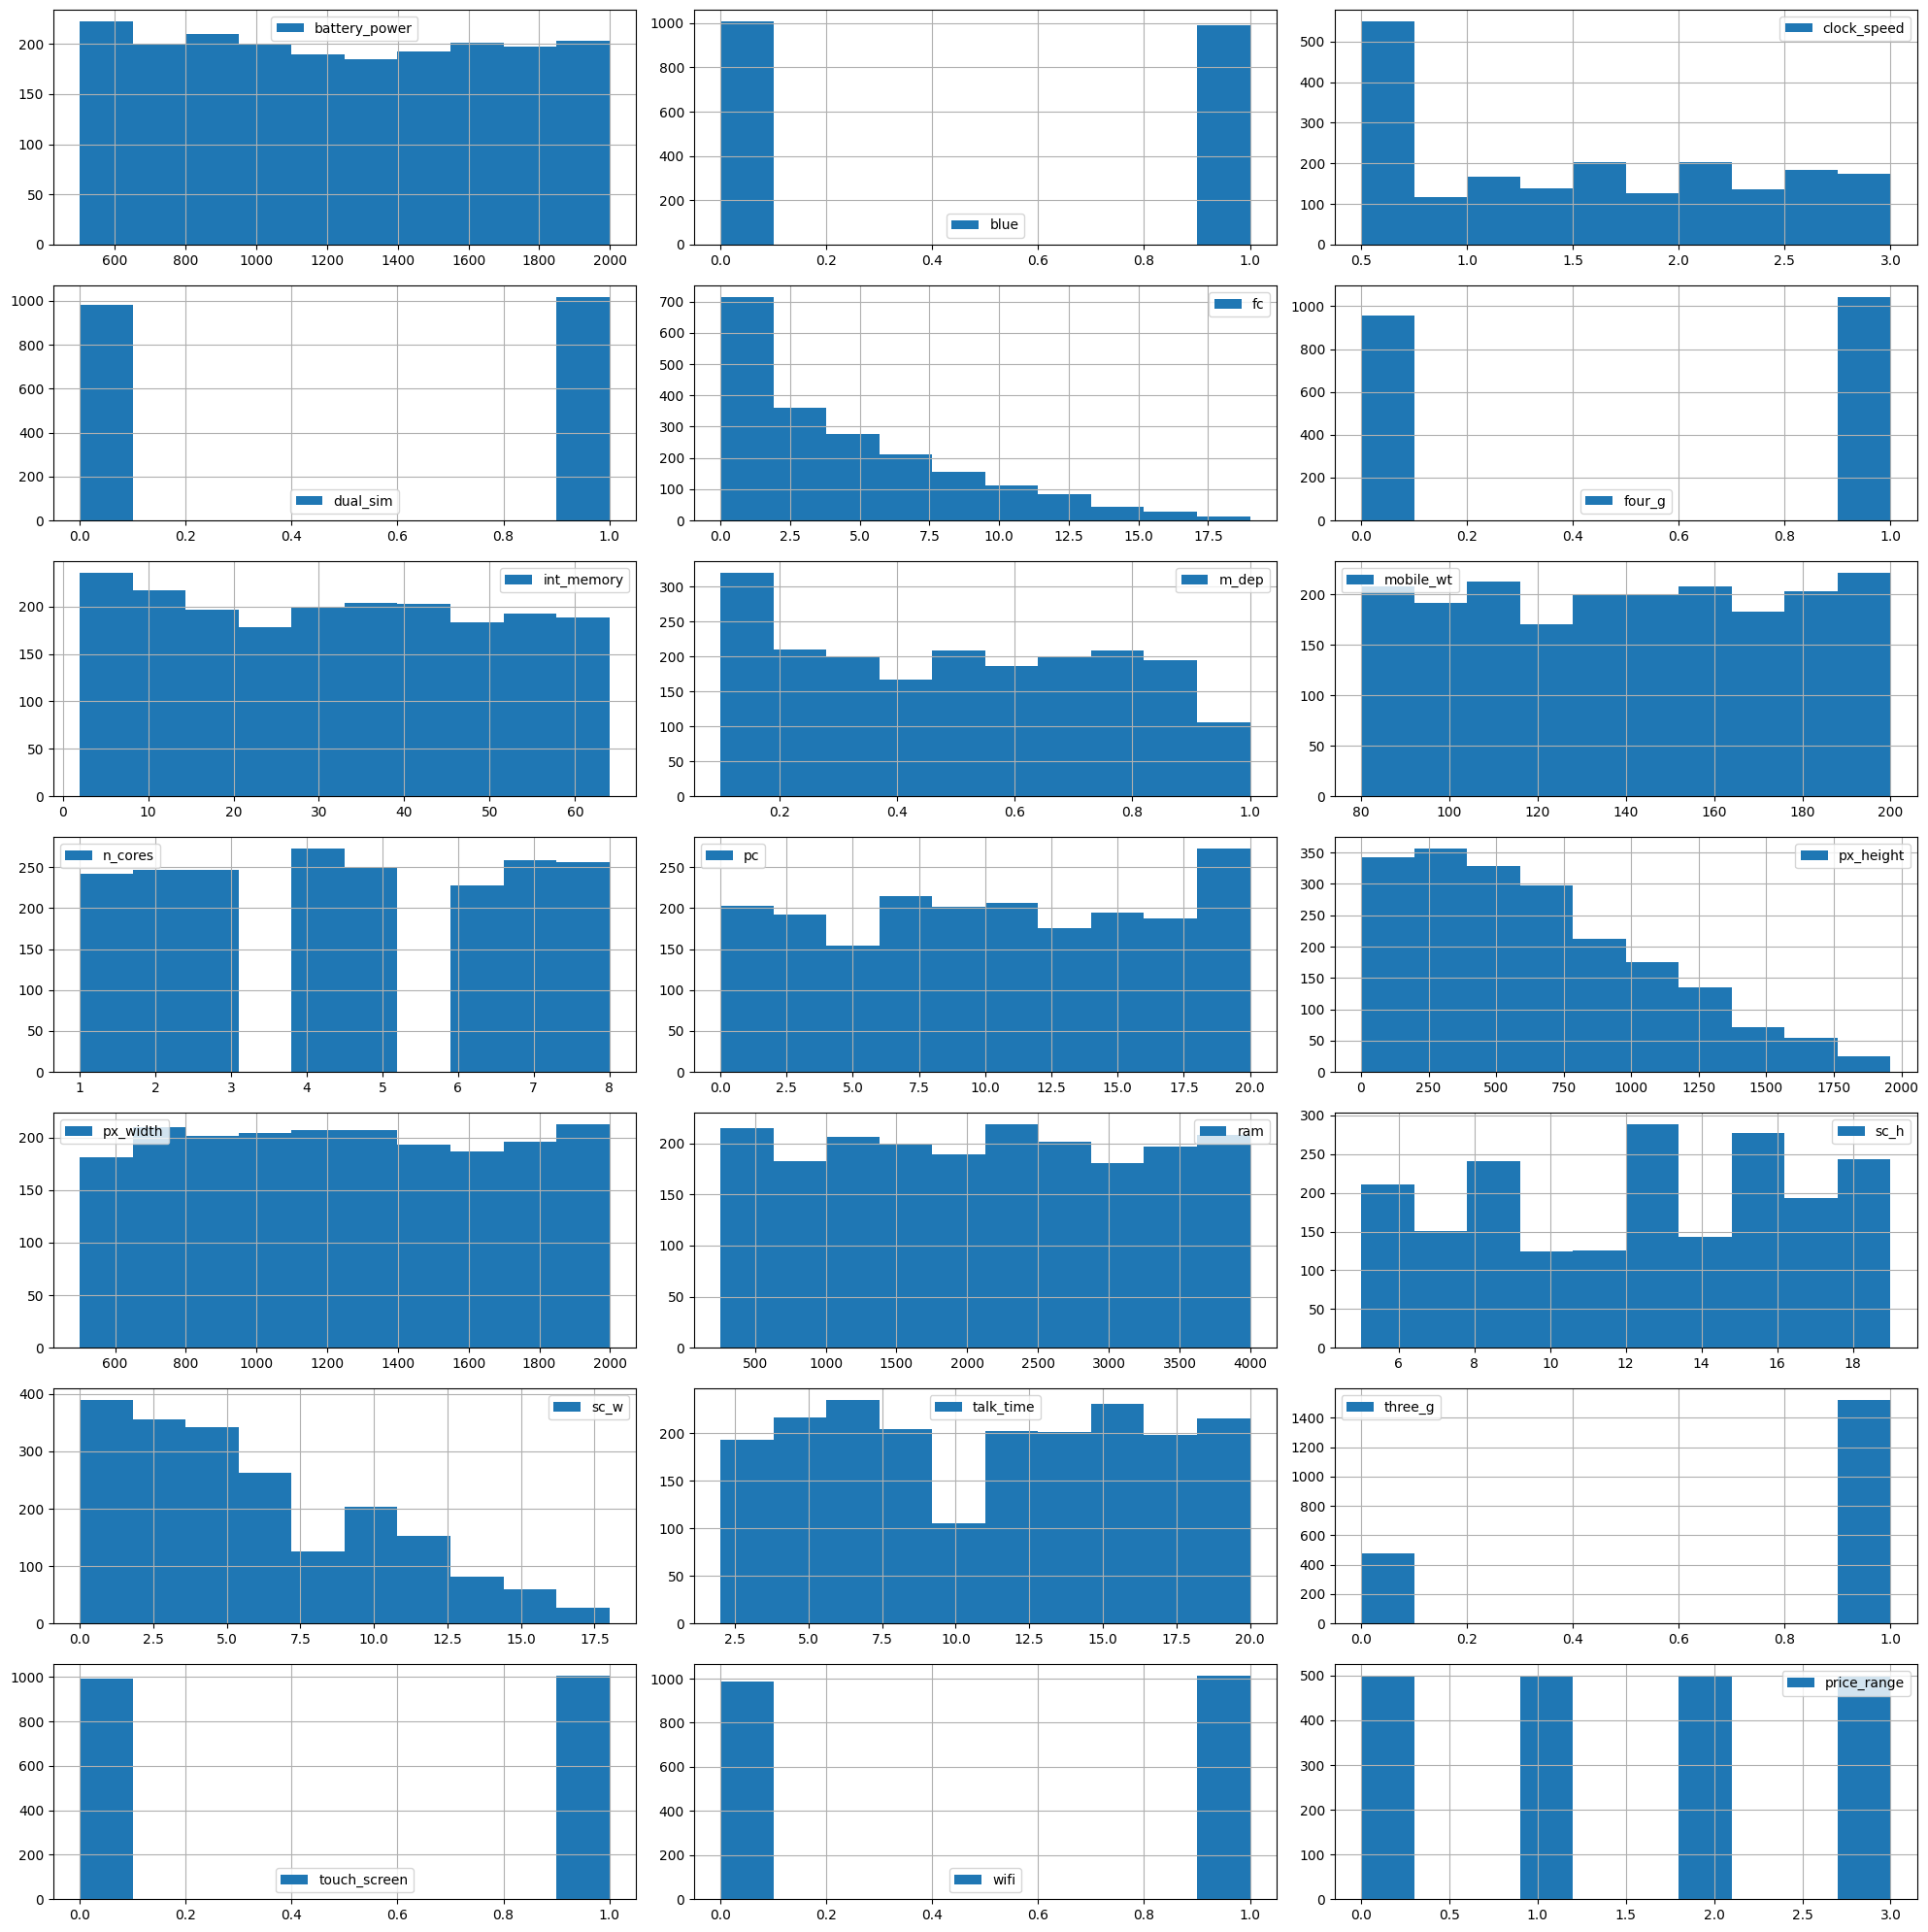

In [54]:
#plot distribution of values of each column

# define the figure and subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 20))
# array to 1D
axes = axes.ravel()
# create a list of dataframe columns to use
cols = df.columns

for col, ax in zip(cols, axes):
    df[col].hist(ax=ax, label=col)
    ax.legend()

fig.tight_layout()
plt.show()

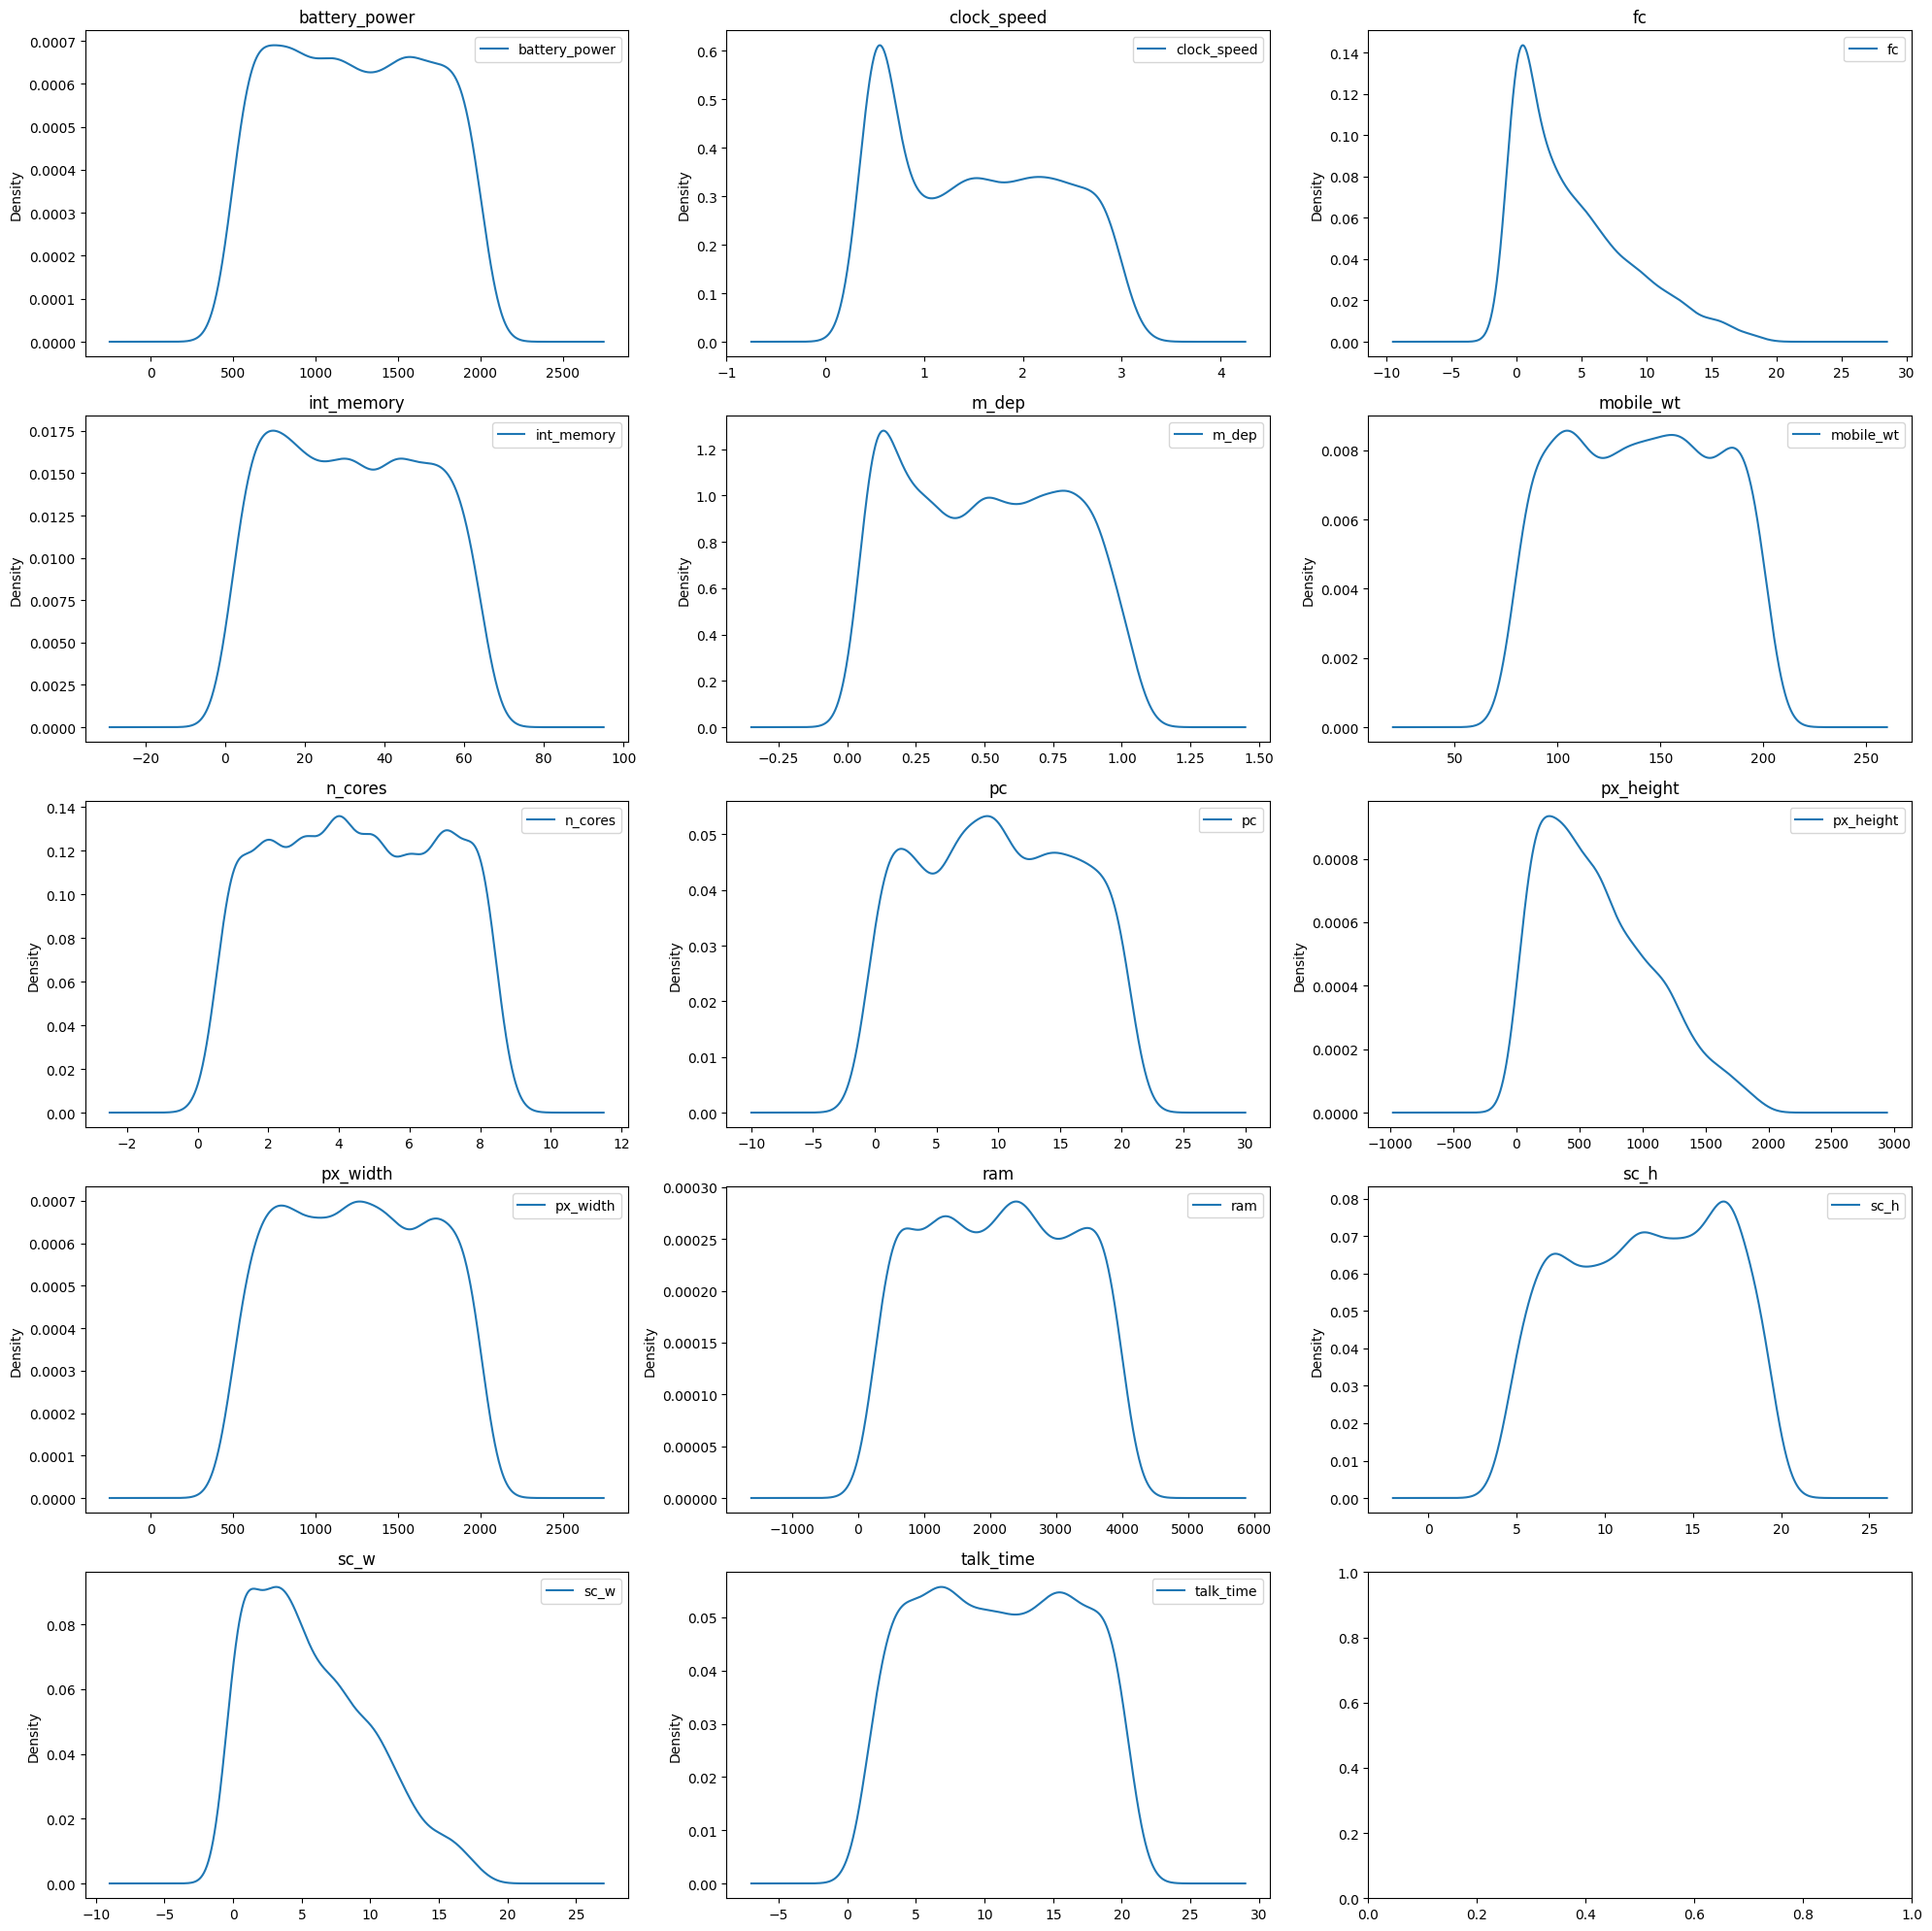

In [55]:
#plot distribution of values of each column

# define the figure and subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
# array to 1D
axes = axes.ravel()
# create a list of dataframe columns to use
cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


for col, ax in zip(cols, axes):
    df[col].plot(kind='density', ax=ax, label=col, title=col)
    ax.legend()

fig.tight_layout()
plt.show()

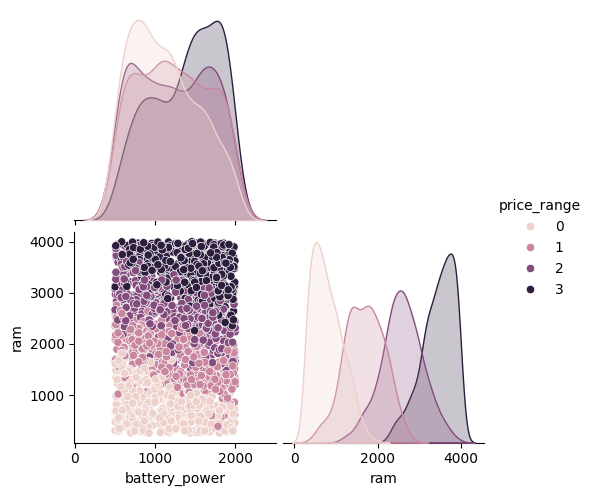

In [56]:
# Pairplot to visualize relationships between Ram and Battery Power since they are the most strongly correlated with price rang
sns.pairplot(df, vars=['battery_power', 'ram'], hue='price_range', corner=True)
plt.show()

In [57]:
df.skew(numeric_only=True)

battery_power    0.031898
blue             0.020016
clock_speed      0.178084
dual_sim        -0.038035
fc               1.019284
four_g          -0.090159
int_memory       0.057323
m_dep            0.085788
mobile_wt        0.004930
n_cores          0.004717
pc               0.018935
px_height        0.663865
px_width         0.016211
ram              0.006493
sc_h            -0.098118
sc_w             0.634157
talk_time        0.009512
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

In [58]:
# Normalize or Standardize features

from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=2000, output_distribution='normal', random_state=0)
to_standarize = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

df[to_standarize] = qt.fit_transform(df[to_standarize])

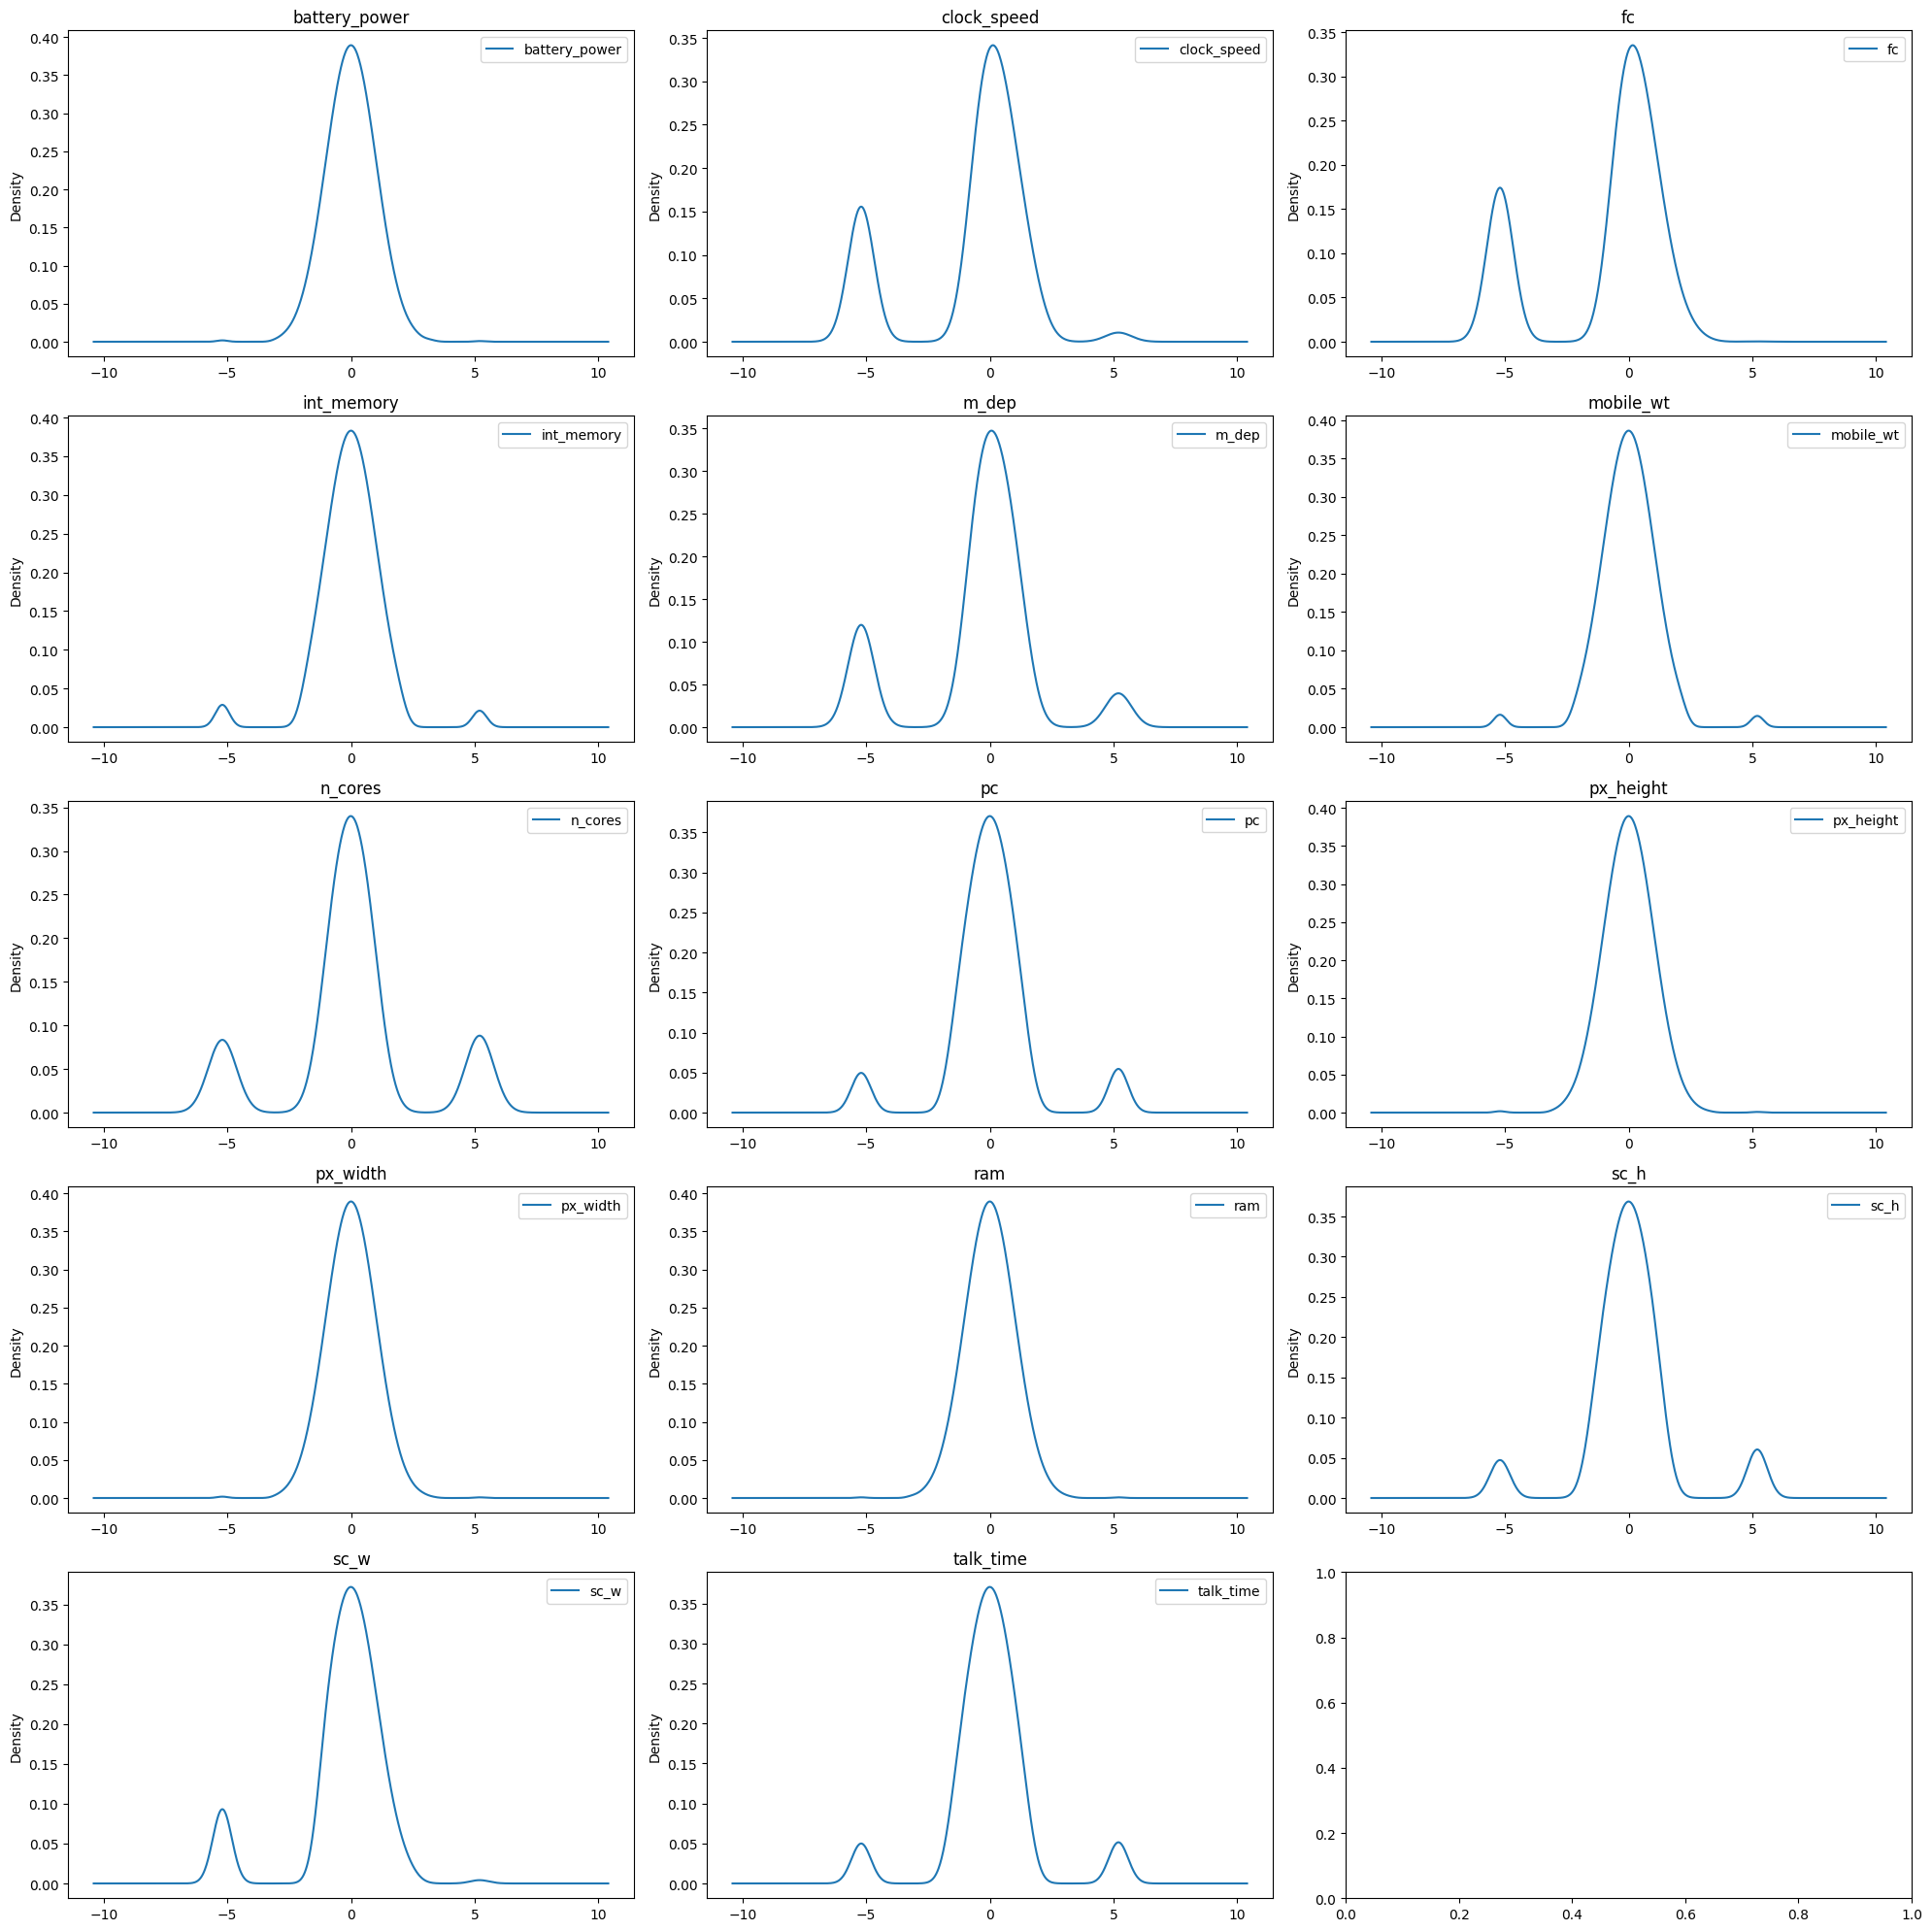

In [61]:
#plot distribution of values of each column

# define the figure and subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
# array to 1D
axes = axes.ravel()
# create a list of dataframe columns to use
cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


for col, ax in zip(cols, axes):
    df[col].plot(kind='density', ax=ax, label=col, title=col)
    ax.legend()

fig.tight_layout()
plt.show()

In [62]:
df.skew(numeric_only=True)

battery_power   -0.044944
blue             0.020016
clock_speed     -0.910940
dual_sim        -0.038035
fc              -0.991540
four_g          -0.090159
int_memory      -0.270240
m_dep           -0.500184
mobile_wt       -0.070878
n_cores          0.020324
pc               0.080160
px_height       -0.046613
px_width        -0.045966
ram              0.000565
sc_h             0.202115
sc_w            -1.610302
talk_time        0.025232
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

In [63]:
df.to_csv("data/train_cleaned_feature_engineering.csv", index=False)

In [64]:
import joblib

# Save the best model
joblib.dump(qt, 'models/qt_scaler.pkl')

['models/qt_scaler.pkl']